# Poverty in America - 2016: Thinkful Data Science Prep Course Capstone

In this report, I will explore poverty rates in America. I will first start by describing the dataset that I will analyze, then I will analyze the data, and I will conclude by proposing some further research. <br><br> The following link to the three main sections of this report.

1. [Describe your dataset](#Describe your dataset) <br>
2. [Ask and answer analytic questions](#Ask and answer analytic questions) <br>
3. [Propose further research](#Propose further research) <br>

_Prep code: Import packages_

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

<a id="Describe your dataset"></a>

## Describe your dataset


> Describe and explore your dataset in the initial section of your Report. What does your data contain and what is its background? Where does it come from? Why is it interesting or significant? Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.

_Load CSV file_

In [5]:
poverty_16 = pd.read_csv('/Users/jAir/Desktop/Poverty_16.csv', index_col=1)

This dataset was download from the __[United States Census Bureau's website](https://www2.census.gov/programs-surveys/saipe/datasets/2016/2016-state-and-county/)__.

The welfare data came from __[usgovernmentspending.com](https://www.usgovernmentspending.com/compare_state_spending_2016b40a)__.

It contains poverty rates for all US states for 2016 and breaks that data down into several subgroups such as families with young Children. It also contains the median househild income and welfare spending in each state.

_Select Columns to analyze and exclude fow with the total for US_

In [11]:
poverty_sub = poverty_16[['Total Population','All Ages', 'Age 0-17',  
                                 'Age 5-17 in Families',
                                 'Age 0-4', 'Median Household Income', 'Welfare']]
poverty_sub = poverty_sub.iloc[1:51, :]

_Visualize the data with a bar chart to begin data exploration._

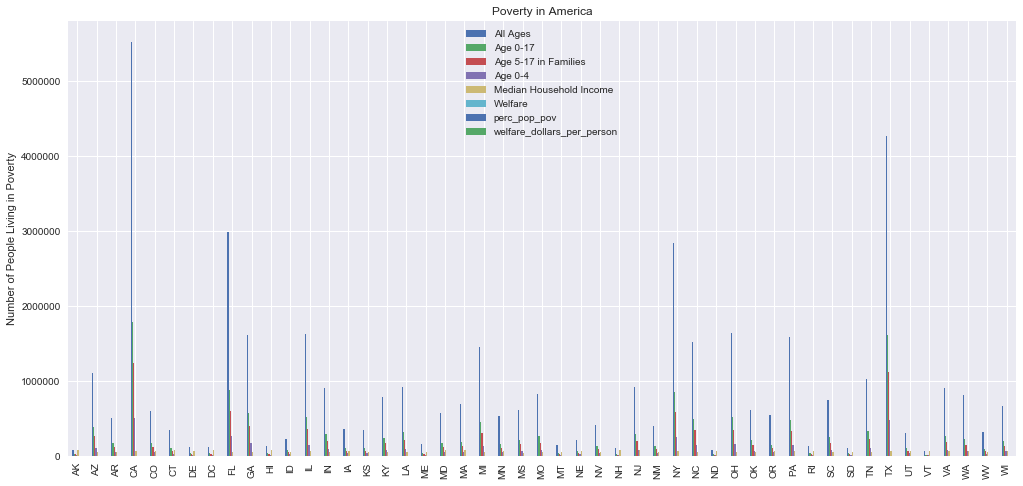

In [37]:
poverty_sub.iloc[1:51, 1:].plot(figsize = (17,8),kind = 'bar')
sns.set()
plt.ylabel("Number of People Living in Poverty")
plt.title('Poverty in America')
plt.show()

This bar highlights the need for two things. First, it is clear that states with large populations, such as California and Texas, have more people living in poverty than states with small populations, e.g. Alaska. Because of this, the data needs to be standardized in some way, which I will do below. Second, this chart shows us that comparing the number of people in poverty by age group is problematic - the chart just contains too much information to view. Below, I break out the different age groups for individual comparison.

_Add new column to dataframe that contains the percent of people in poverty which allows for a better comparison between levels of poverty in each state. Then create a bar chart of the percentage of the population of each state living in poverty. To add in viewing that data, I also sort the data by the perc pop pov column._


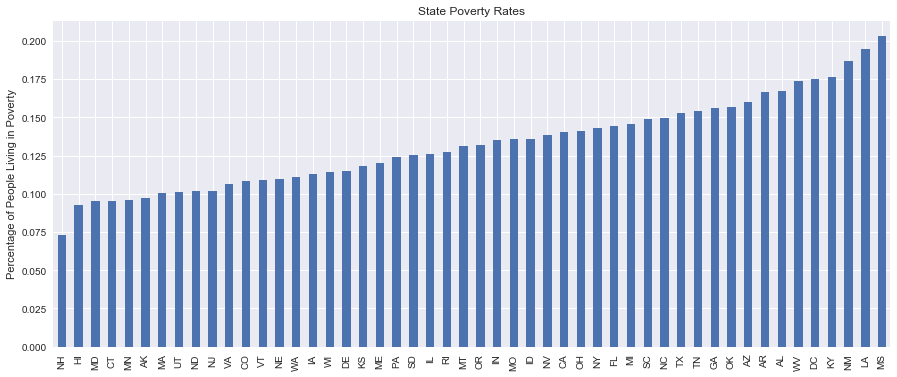

In [38]:
poverty_sub['perc_pop_pov'] = poverty_sub['All Ages']/poverty_sub['Total Population']
poverty_sort = poverty_sub.sort_values(by=['perc_pop_pov'])
poverty_sort.iloc[0:, -2].plot(figsize = (15,6), kind = 'bar')
plt.ylabel('Percentage of People Living in Poverty')
plt.title('State Poverty Rates')
plt.show()

The bar chart above helps us to easily compare the rates of poverty in each state. New Hampshire has the lowest rate of poverty, while Minisota has the highest rate.

_Before continuing with the analysis, it is important to understand the dataset better. To do that, I produce a histogram and a QQ plot._

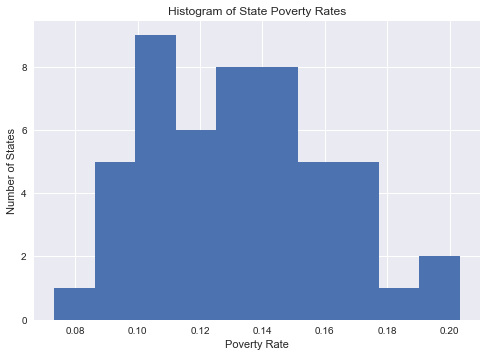

In [39]:
poverty_sub.perc_pop_pov.hist()
plt.ylabel('Number of States')
plt.xlabel('Poverty Rate')
plt.title('Histogram of State Poverty Rates')
plt.show()

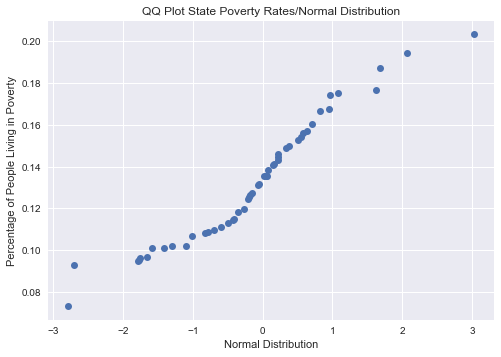

In [42]:
norm = np.random.normal(0, 1, 50)
norm.sort()
plt.plot(norm, poverty_sort.perc_pop_pov, "o") 
plt.ylabel('Percentage of People Living in Poverty')
plt.xlabel('Normal Distribution')
plt.title('QQ Plot State Poverty Rates/Normal Distribution')
plt.show() 

From the above histogram and the QQ plot, we see that the poverty data is roughly normal. Knowing this allows for some specific types of statistical analysis that I will cover below.

A final piece of data that I want to explore is welfare spending.

_Add a column for welfare spending per person_

In [26]:
poverty_sub['welfare_dollars_per_person'] = (poverty_sub['Welfare']*1000000000)/poverty_sub['Total Population']

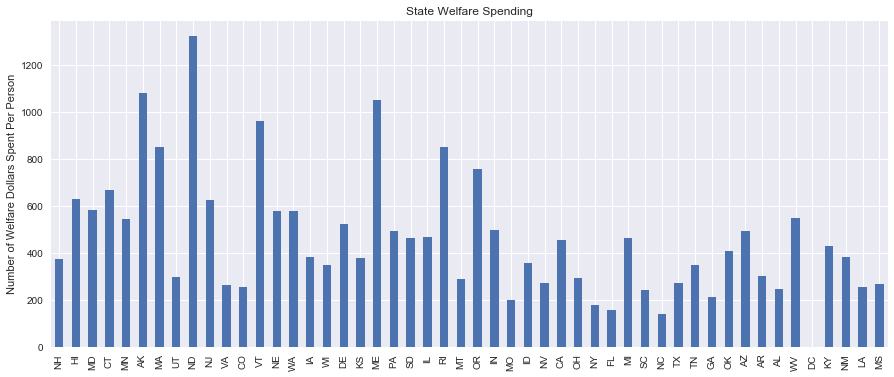

In [43]:
poverty_sort.iloc[0:, -1].plot(figsize = (15,6), kind = 'bar')
plt.ylabel('Number of Welfare Dollars Spent Per Person')
plt.title('State Welfare Spending')
plt.show()

Here we see a large range of welfare spending per person. I will analyze this further below.

<a id="Ask and answer analytic questions"></a>

## Ask and answer analytic questions

 > Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviors or comparisons of the population.

The above exploration of the poverty rates in the US leads me to ask the following questions: <br>

1. Given the range of poverty rates, which states can be considered "abnormal"?
2. How do poverty rates for specific age ranges compare to the overall poverty rates for each state?
3. Is there a correlation between poverty rates and welfare spending?

In order to understand which states' poverty rates might be abnormal, I calculate the z-score for each states' poverty rate. Given that this data is roughly normal, any state with a z-score on either side of 2/-2 can be considered extreme.

_I begin by creating three new columns:_
1. z_score_perc_pov contains the z-score of perc_pop_pov;
2. perc_pop_child contains the percentage of the population that are children living in poverty;
3. z_score_perc_child contains the z_scores for perc_pop_child. The z-scores are calculated to help understand better how each state's poverty rates compare.

In [44]:
poverty_sub['z_score_perc_pov'] = (poverty_sub.perc_pop_pov - poverty_sub.perc_pop_pov.mean())/poverty_sub.perc_pop_pov.std(ddof=0)
poverty_sub['perc_pop_child'] = poverty_sub['Age 0-4']/poverty_sub['Total Population']
poverty_sub['z_score_perc_child'] = (poverty_sub.perc_pop_child - poverty_sub.perc_pop_child.mean())/poverty_sub.perc_pop_child.std(ddof=0)

_Then I plot the z-scores for overall poverty rates, sorted from least to greatest and color coded, with blue being low and red being high._

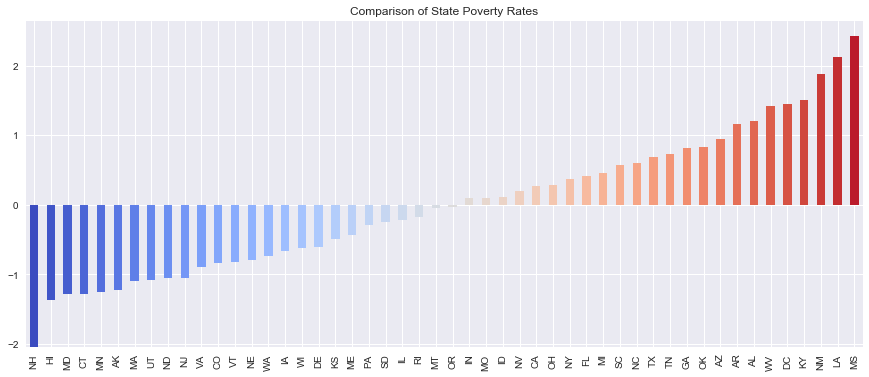

In [50]:
poverty_sort_z = poverty_sub.sort_values(by=['z_score_perc_pov'])

colors = plt.cm.coolwarm(np.linspace(0,1,51))
poverty_sort_z.iloc[0:, -3].plot(figsize = (15,6), kind = 'bar', stacked=True, color = colors)
plt.title('Comparison of State Poverty Rates')
plt.show()

This chart quickly shows us the range of poverty rates in America. New Hampshire stands out as having an abnormally low poverty rate, while Louisiana and Minnesota have abnormally high poverty rates.

In order to compare poverty rates for families with young children (0-4 years of age) with the overall rate of poverty in the general population, I plot the z-scores for the 0-4 age group, while keeping the data sort according to the rate of poverty in the general population.

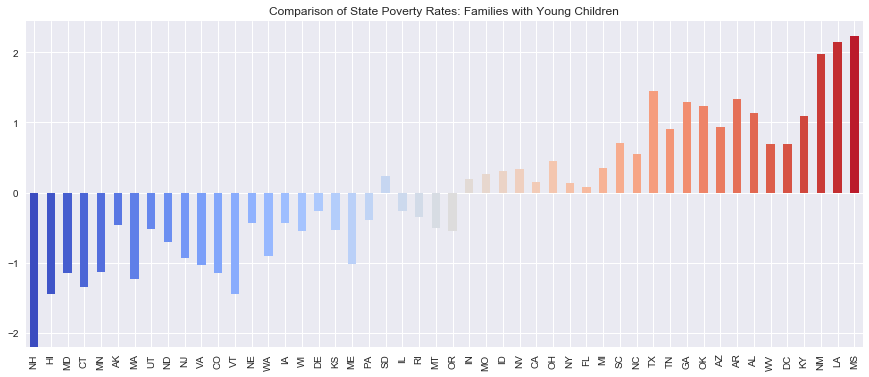

In [51]:
poverty_sort_z.iloc[0:, -1].plot(figsize = (15,6), kind = 'bar', stacked=True, color = colors)
plt.title('Comparison of State Poverty Rates: Families with Young Children')
plt.show()

The bars that appear to be "out of order" represent those states that have significantly different rates of poverty for the 0-4 age group compared to the overall population. While both West Virgina and DC have overall high rates of poverty, their poverty rates for families with young children are lower. On the other end of the spectrum, we see that Alaska has a relatively low rate of poverty overall, but its rate for families with children is not as impressive.

_Another way to view the same data is to plot both the overall rate and the rate for 0-4 together_

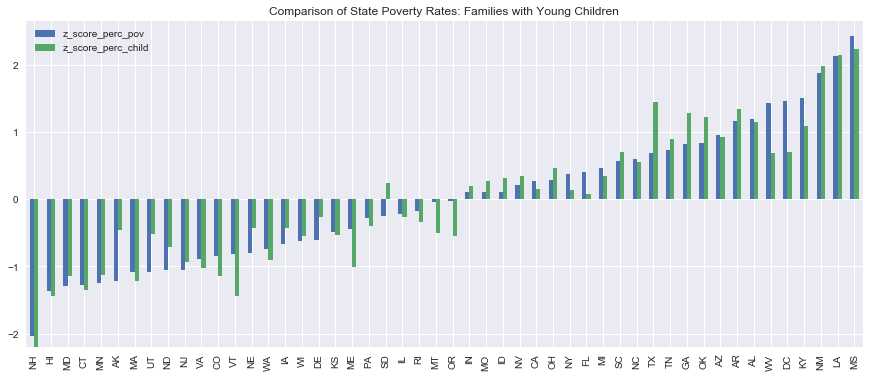

In [52]:
poverty_sort_z.iloc[0:, [-3, -1]].plot(figsize = (15,6), kind = 'bar')
plt.title('Comparison of State Poverty Rates: Families with Young Children')
plt.show()

This view helps to highlight some of the difference between poverty rates better. As an example, my home state of Oregon is right in the middle for overall poverty rate, but its rate for families with young children is significantly better.

The final question that I wanted to analyze is: Is there a correlation between poverty rates and welfare spending?

_To address that question, I use a scatter plot._

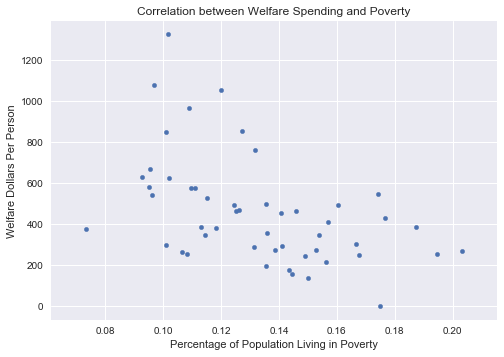

In [49]:
poverty_sort.plot.scatter('perc_pop_pov', 'welfare_dollars_per_person')
plt.ylabel('Welfare Dollars Per Person')
plt.xlabel('Percentage of Population Living in Poverty')
plt.title('Correlation between Welfare Spending and Poverty')
plt.show()

The scatter plot seems to show a slight correlation between welfare spending and poverty rates. All the states with welfare spending above 600 dollars per person have rates of poverty below 13 percent. There also appears to be a slight downward slop to the data. In order to test this correlation, I replot the data and include the Pearson Correlation Coefficient and p-value:

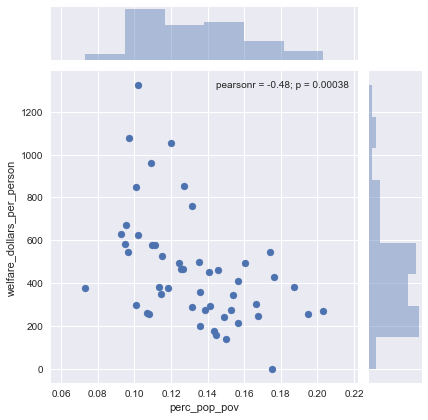

In [53]:
sns.jointplot(x="perc_pop_pov", y="welfare_dollars_per_person", data=poverty_sort)
plt.show()

With a -0.48 PCC, we can conclude that there is a maderate neggative correlation between welfare spending and poverty rates.

<a id="Propose further research"></a>

## Propose further research

> Lastly, make a proposal for a realistic future research project on this dataset that would use some data science techniques you'd like to learn in the bootcamp. Just like your earlier questions, your research proposal should present one or more clear questions. Then you should describe the techniques you would apply in order to arrive at an answer.

For future analysis, I would like to explore how poverty rates have changed over time. Data is readily available for atleast as far back as 1995, giving us 11 years worth of data to work with. My main question would be: Is there a long term correlation between welfare spending and poverty rates. I would like to use some machine learning models to predict what would happen to poverty rates if a state increased its spending on welfare. I would also like to include other relevant data, such as spending on unemployment, housing assistance, healthcare, food programs, and other social safety net programs. Other interesting data to include might be unemployment rates, houselessness rates, levels of education, rates of urbanization, major industries for each state, among many others. 